In [1]:
import DeepMIMO
import numpy as np

# Channel generation
DeepMIMO_params = DeepMIMO.default_params() # Load the default parameters
DeepMIMO_params['dataset_folder'] = r'DeepMIMOFiles/ray_tracing' # Path to the downloaded scenarios
DeepMIMO_params['scenario'] = 'O1_60' # DeepMIMO scenario
DeepMIMO_params['num_paths'] = 10 # Maximum number of paths
DeepMIMO_params['active_BS'] = np.array([6]) # Basestation indices to be included in the dataset

# Selected rows of users, whose channels are to be generated.
DeepMIMO_params['user_row_first'] = 400 # First user row to be included in the dataset
DeepMIMO_params['user_row_last'] = 450 # Last user row to be included in the dataset

# Configuration of the antenna arrays
DeepMIMO_params['bs_antenna']['shape'] = np.array([16, 1, 1]) # BS antenna shape through [x, y, z] axes
DeepMIMO_params['ue_antenna']['shape'] = np.array([1, 1, 1]) # UE antenna shape through [x, y, z] axes

# The OFDM_channels parameter allows choosing between the generation of channel impulse
# responses (if set to 0) or frequency domain channels (if set to 1).
# It is set to 0 for this simulation, as the channel responses in frequency domain
# will be generated using Sionna.
DeepMIMO_params['OFDM_channels'] = 0

dataset = DeepMIMO.generate_data(DeepMIMO_params)


Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 9231/9231 [00:01<00:00, 6310.67it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<?, ?it/s]


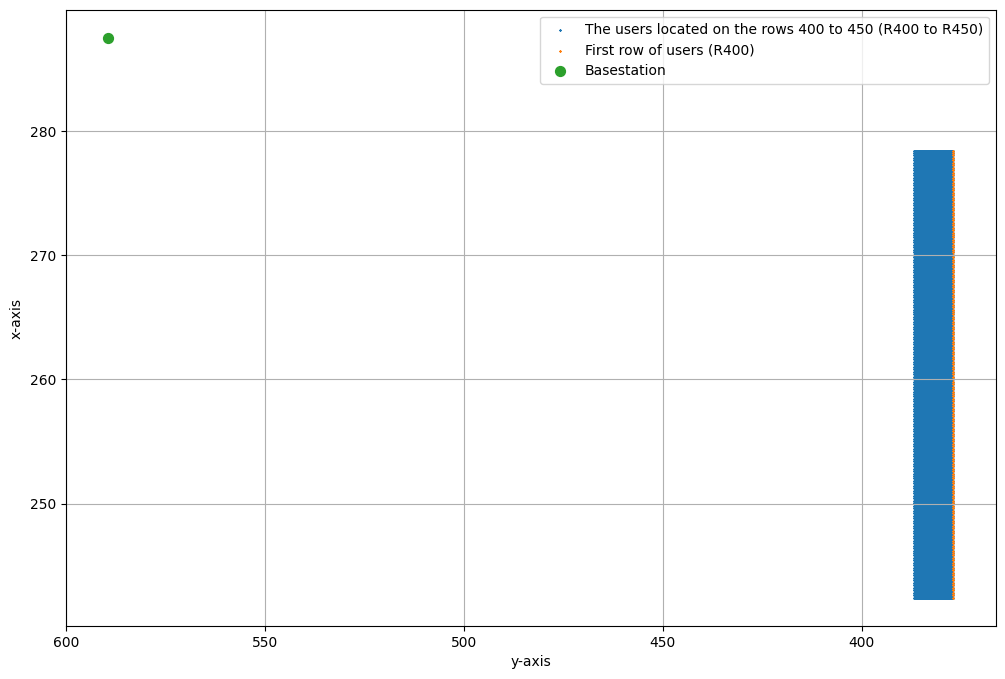

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import os

plt.figure(figsize=(12,8))

## User locations
active_bs_idx = 0 # Select the first active basestation in the dataset
plt.scatter(dataset[active_bs_idx]['user']['location'][:, 1], # y-axis location of the users
         dataset[active_bs_idx]['user']['location'][:, 0], # x-axis location of the users
         s=1, marker='x', c='C0', label='The users located on the rows %i to %i (R%i to R%i)'%
           (DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last'],
           DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last']))
# First 181 users correspond to the first row

plt.scatter(dataset[active_bs_idx]['user']['location'][0:181, 1],
         dataset[active_bs_idx]['user']['location'][0:181, 0],
         s=1, marker='x', c='C1', label='First row of users (R%i)'% (DeepMIMO_params['user_row_first']))

## Basestation location
plt.scatter(dataset[active_bs_idx]['location'][1],
         dataset[active_bs_idx]['location'][0],
         s=50.0, marker='o', c='C2', label='Basestation')

plt.gca().invert_xaxis() # Invert the x-axis to align the figure with the figure above
plt.ylabel('x-axis')
plt.xlabel('y-axis')
plt.grid()
plt.legend()

In [3]:
dataset[0].keys()

dict_keys(['user', 'basestation', 'location'])

In [4]:
dataset[0]['user'].keys()

dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])

In [5]:
dataset[0]['user']['paths'][0].keys()

dict_keys(['num_paths', 'DoD_phi', 'DoD_theta', 'DoA_phi', 'DoA_theta', 'phase', 'ToA', 'power'])

In [6]:
dataset[0]['user']['paths'][0]

{'num_paths': 7,
 'DoD_phi': array([-101.976 , -101.976 , -107.976 ,  -75.0812,  -75.0812, -107.976 ,
        -129.004 ], dtype=float32),
 'DoD_theta': array([91.0548, 91.8981, 91.026 , 91.0419, 91.8749, 92.0514, 90.8414],
       dtype=float32),
 'DoA_phi': array([ 78.0243,  78.0243, 107.529 ,  75.0812,  75.0812, 107.529 ,
         51.4429], dtype=float32),
 'DoA_theta': array([88.9452, 91.8981, 88.974 , 88.9581, 91.8749, 92.0514, 89.1586],
       dtype=float32),
 'phase': array([  79.5642,   77.1619, -134.868 ,   70.4298,  140.655 , -136.435 ,
         -92.5008], dtype=float32),
 'ToA': array([7.25063e-07, 7.25338e-07, 7.45348e-07, 7.34022e-07, 7.34294e-07,
        7.45706e-07, 9.08851e-07], dtype=float32),
 'power': array([1.6470228e-12, 1.2419382e-12, 1.0932012e-12, 8.7377685e-13,
        6.5117800e-13, 5.2239669e-13, 5.2203547e-15], dtype=float32)}

Want to predict path of basestation, so user paths arent needed

In [7]:
dataset[0]['user']['LoS']

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
user_LoS = dataset[0]['user']['LoS']

In [9]:
dataset[0]['user']['location']

array([[242.42300415, 376.9710083 ,   2.        ],
       [242.6230011 , 376.9710083 ,   2.        ],
       [242.82299805, 376.9710083 ,   2.        ],
       ...,
       [278.02301025, 386.9710083 ,   2.        ],
       [278.22299194, 386.9710083 ,   2.        ],
       [278.42300415, 386.9710083 ,   2.        ]])

In [10]:
user_locations = dataset[0]['user']['location'][:, 0:2]

In [11]:
dataset[0]['user']['distance']

array([217.29800415, 217.25700378, 217.21499634, ..., 202.79400635,
       202.78500366, 202.77600098])

In [12]:
user_distances = dataset[0]['user']['distance']

In [13]:
dataset[0]['user']['pathloss']

array([111.48500061, 105.31199646, 110.26699829, ..., 110.22799683,
       126.6740036 , 115.0510025 ])

In [14]:
user_pathloss = dataset[0]['user']['pathloss']

In [15]:
dataset[0]['user']['channel'].shape

(9231, 1, 16, 10)

In [16]:
user_channels = dataset[0]['user']['channel']

In [17]:
dataset[0]['basestation'].keys()

dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])

In [18]:
dataset[0]['basestation']['location']

array([[287.5039978 , 589.50402832,   6.        ]])

In [19]:
baseX = dataset[0]['basestation']['location'][0][0]
baseY = dataset[0]['basestation']['location'][0][1]

In [20]:
base_paths = dataset[0]['basestation']['paths'][0]

In [21]:
base_pathloss = dataset[0]['basestation']['pathloss'][0]

In [22]:
base_channels = dataset[0]['basestation']['channel']

In [23]:
features = {
    'user_LoS': user_LoS,
    'user_locations': user_locations,
    'user_distances': user_distances,
    'user_pathloss': user_pathloss,
    'user_channels': user_channels,
    'baseX': baseX,
    'baseY': baseY,
    'base_paths': base_paths,
    'base_pathloss': base_pathloss,
    'base_channels': base_channels
}

In [24]:
point1 = [user_LoS[0], user_locations[0][0], user_locations[0][1], user_distances[0], user_pathloss[0], user_channels[0], baseX, baseY, base_paths, base_pathloss, base_channels[0]]
point2 = [user_LoS[1], user_locations[1][0], user_locations[1][1], user_distances[1], user_pathloss[1], user_channels[1], baseX, baseY, base_paths, base_pathloss, base_channels[0]]

In [25]:
point1

[np.int64(1),
 np.float64(242.42300415039062),
 np.float64(376.97100830078125),
 np.float64(217.29800415039062),
 np.float64(111.48500061035156),
 array([[[ 2.32460465e-07+1.26213502e-06j,
           2.47621216e-07+1.08656434e-06j,
          -7.37619189e-07-7.41025758e-07j,
           3.13108700e-07+8.80760922e-07j,
          -6.24053428e-07+5.11600774e-07j,
          -5.23714164e-07-4.98116663e-07j,
          -3.15259818e-09-7.21832123e-08j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j],
         [ 9.50417927e-07+8.62396917e-07j,
           8.55793417e-07+7.13831867e-07j,
          -1.02835122e-06+1.88931125e-07j,
          -4.20925488e-07+8.34624814e-07j,
          -8.00990449e-07-9.79404220e-08j,
          -7.07104903e-07+1.49664260e-07j,
          -6.50630128e-08+3.14190984e-08j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000

In [26]:

location = dataset[0]['user']['location'] # ML model input
channels = dataset[0]['user']['channel'] # ML model output
channels = channels.reshape(9231, -1)

In [27]:
print('Channel data shape:', channels.shape) # num_UEs x num_RX_ant x num_TX_ant x num_OFDM_subcarriers
print('Location data shape:', location.shape) # num_UEs x 3 (x, y, z)

Channel data shape: (9231, 160)
Location data shape: (9231, 3)


In [28]:
trainX = location[0:400]
trainY = channels[0:400]
testX = location[400:500]
testY = channels[400:500]
print('Train data shape:', trainX.shape) # num_UEs x 3 (x, y, z)
print('Train label shape:', trainY.shape) # num_UEs x num_RX_ant x num_TX_ant x num_OFDM_subcarriers
print('Test data shape:', testX.shape) # num_UEs x 3 (x, y, z)
print('Test label shape:', testY.shape)

Train data shape: (400, 3)
Train label shape: (400, 160)
Test data shape: (100, 3)
Test label shape: (100, 160)


In [29]:
import os
import keras
import keras.api.models as models
from keras.api.layers import Dense,Dropout
import numpy as np

for bs_idx in range(4):
    idx_str = 'BS%i' % bs_idx
    idx = bs_idx*32
    
    model = models.Sequential()
    # Input layer
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=trainX.shape[1:]))
    model.add(Dropout(0.1))  # Slightly higher dropout to prevent overfitting

    # Hidden layers with increased units and additional layers
    for _ in range(4):  # Add four hidden layers
        model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(0.1))

    # Final hidden layer
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.1))

    # Output layer with the number of units matching your output dimensions
    model.add(Dense(32, activation='linear'))  # Adjust activation if necessary
    model.compile(loss="mean_squared_error", optimizer='adam')
    model.summary()

    model.fit(trainX,
                trainY[:, idx:idx + 32],
                batch_size=10,
                epochs=32,
                verbose=2,
                validation_data=(testX, testY[:,idx:idx + 32]),
                shuffle=True
)

c:\Users\seanc\School\ML\Python\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,936 (1.02 MB)

 Trainable params: 267,936 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
40/40 - 6s - 145ms/step - loss: 4830.8145 - val_loss: 1.3788
Epoch 2/32
40/40 - 0s - 8ms/step - loss: 67.3929 - val_loss: 6.2749e-05
Epoch 3/32
40/40 - 0s - 6ms/step - loss: 17.2424 - val_loss: 6.6584e-05
Epoch 4/32
40/40 - 0s - 6ms/step - loss: 8.5081 - val_loss: 6.8379e-05
Epoch 5/32
40/40 - 0s - 10ms/step - loss: 3.4575 - val_loss: 6.9632e-05
Epoch 6/32
40/40 - 0s - 7ms/step - loss: 1.9626 - val_loss: 6.9946e-05
Epoch 7/32
40/40 - 0s - 6ms/step - loss: 1.6059 - val_loss: 6.9717e-05
Epoch 8/32
40/40 - 0s - 9ms/step - loss: 0.8952 - val_loss: 6.9465e-05
Epoch 9/32
40/40 - 0s - 6ms/step - loss: 0.2873 - val_loss: 6.9072e-05
Epoch 10/32
40/40 - 0s - 6ms/step - loss: 0.7130 - val_loss: 6.9006e-05
Epoch 11/32
40/40 - 0s - 5ms/step - loss: 0.4992 - val_loss: 6.8812e-05
Epoch 12/32
40/40 - 0s - 6ms/step - loss: 0.3420 - val_loss: 6.8131e-05
Epoch 13/32
40/40 - 0s - 6ms/step - loss: 0.2181 - val_loss: 6.7614e-05
Epoch 14/32
40/40 - 0s - 6ms/step - loss: 0.4503 - val_loss: 6.7174e-

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,936 (1.02 MB)

 Trainable params: 267,936 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
40/40 - 5s - 113ms/step - loss: 14062.8428 - val_loss: 0.0325
Epoch 2/32
40/40 - 0s - 6ms/step - loss: 124.5697 - val_loss: 6.5216e-05
Epoch 3/32
40/40 - 0s - 6ms/step - loss: 40.2513 - val_loss: 6.8845e-05
Epoch 4/32
40/40 - 0s - 9ms/step - loss: 19.2297 - val_loss: 7.1362e-05
Epoch 5/32
40/40 - 0s - 6ms/step - loss: 7.6278 - val_loss: 7.2143e-05
Epoch 6/32
40/40 - 0s - 6ms/step - loss: 3.9064 - val_loss: 7.1707e-05
Epoch 7/32
40/40 - 0s - 5ms/step - loss: 5.2854 - val_loss: 7.1260e-05
Epoch 8/32
40/40 - 0s - 6ms/step - loss: 2.2014 - val_loss: 7.1868e-05
Epoch 9/32
40/40 - 0s - 6ms/step - loss: 2.1460 - val_loss: 7.2343e-05
Epoch 10/32
40/40 - 0s - 6ms/step - loss: 2.9117 - val_loss: 7.2100e-05
Epoch 11/32
40/40 - 0s - 10ms/step - loss: 1.3805 - val_loss: 7.1201e-05
Epoch 12/32
40/40 - 0s - 10ms/step - loss: 0.2361 - val_loss: 7.0856e-05
Epoch 13/32
40/40 - 0s - 7ms/step - loss: 0.3883 - val_loss: 7.0556e-05
Epoch 14/32
40/40 - 0s - 6ms/step - loss: 0.5633 - val_loss: 7.04

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,936 (1.02 MB)

 Trainable params: 267,936 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
40/40 - 5s - 126ms/step - loss: 12195.3916 - val_loss: 5.6074e-05
Epoch 2/32
40/40 - 0s - 6ms/step - loss: 139.2794 - val_loss: 6.5208e-05
Epoch 3/32
40/40 - 0s - 7ms/step - loss: 39.5599 - val_loss: 6.8092e-05
Epoch 4/32
40/40 - 0s - 10ms/step - loss: 18.9268 - val_loss: 6.8470e-05
Epoch 5/32
40/40 - 0s - 8ms/step - loss: 9.3243 - val_loss: 7.0481e-05
Epoch 6/32
40/40 - 0s - 9ms/step - loss: 5.9903 - val_loss: 7.0942e-05
Epoch 7/32
40/40 - 0s - 7ms/step - loss: 5.8176 - val_loss: 7.1823e-05
Epoch 8/32
40/40 - 0s - 6ms/step - loss: 1.5806 - val_loss: 7.2012e-05
Epoch 9/32


KeyboardInterrupt: 

In [ ]:
predictions = model.predict([location[500:], channels[500:]])

for i in range(5):  # Display a few samples
    print(f"Predicted: {predictions[i]}")
    print(f"Actual: {channels[500+i]}")
    print("\n")

 35/273 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

c:\Users\seanc\School\ML\Python\Project\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_322300. Received: the structure of inputs=('*', '*')
  warnings.warn(


273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Actual: [ 8.36488368e-07-1.0202405e-06j -1.13966132e-06-7.8353700e-08j
 -3.18525707e-07+8.6053313e-07j -6.81651954e-07+4.2910949e-07j
  7.33188976e-09-5.0007085e-08j -3.96762303e-08-2.0564448e-08j
 -3.39277428e-09+1.4867824e-09j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  5.48536548e-07-1.1998795e-06j -1.12196290e-06+2.1486400e-07j
  7.47627041e-07+5.3200540e-07j  2.36074101e-07+7.7009958e-07j
 -4.26314521e-08+2.7148191e-08j  1.03623465e-08+4.3470926e-08j
  1.28124233e-09-3.4756089e-09j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  2.24284733e-07-1.3001153e-06j -1.03007562e-06+4.9387398e-07j
  7.08634559e-07-5.8293483e-07j  8.05031050e-07-2.6633327e-08j
  4.84150604e-08+1.4506797e-08j  2.61327493e-08-3.6251610e-08j
  1.61594849e-09+3.333